     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

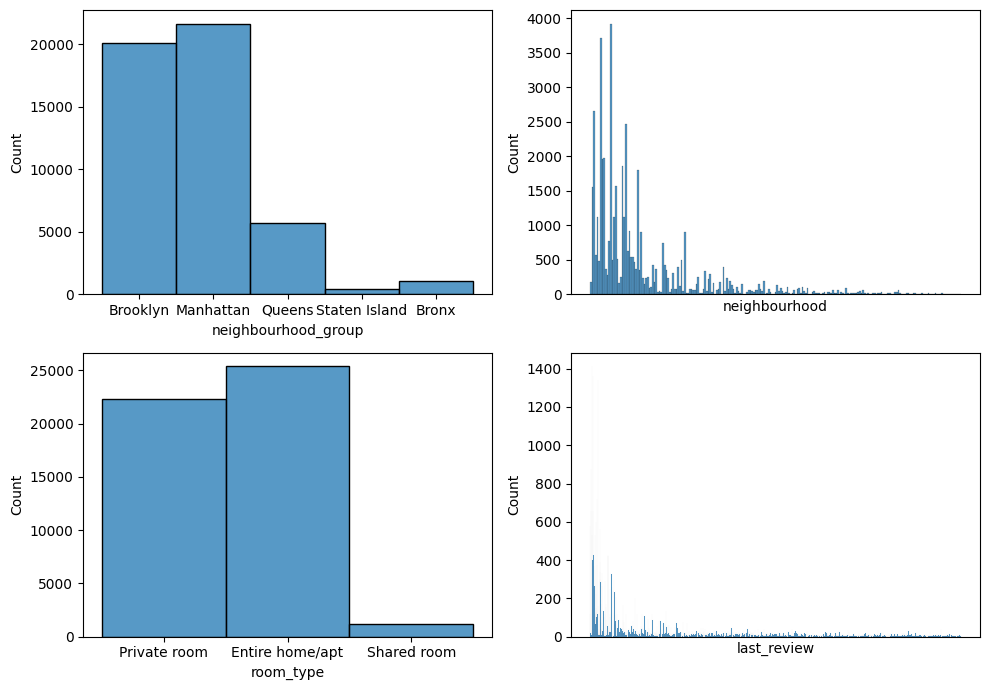

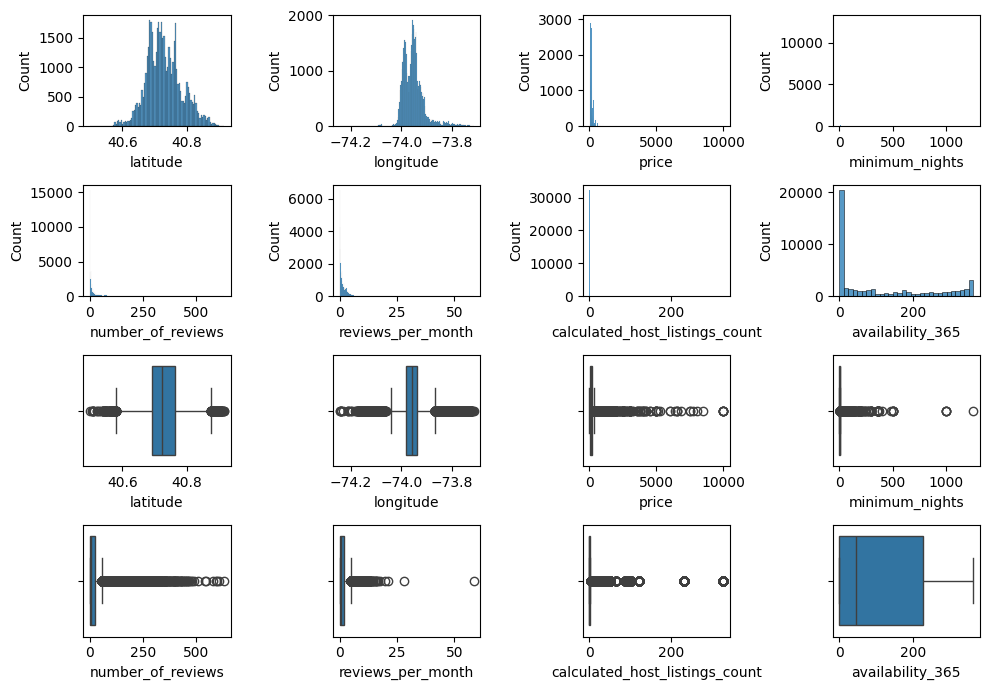

Done


In [1]:
#from utils import db_connect
#engine = db_connect()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, SelectKBest

# your code here
df = pd.read_csv("/workspaces/Machine-learning-python/data/raw/AB_NYC_2019.csv")
print(df.head())
print(df.shape)
print(df.info())
print(df.describe(include=np.number).T)
print(df.describe(include=["O"]).T) #or "object"
print(df.drop("id", axis = 1).duplicated().sum())
if df.drop("id", axis = 1).duplicated().sum() != 0:
    df.drop_duplicates(inplace=True)
"""Clean the data"""
df.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=["object"])
print(df.info())
"""Categorical Data"""
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
index = 0
for i in range(2):
    if index > 3:
        break
    for j in range(2):
        c = df_cat.columns[index]
        s = sns.histplot(ax = axis[i,j],data = df_cat, x = c)
        if c in ["neighbourhood", "last_review"]:
            s.set_xticks([])
        index  +=1
# Adjust the layout
plt.xticks(rotation = 90)
plt.tight_layout()
# Show the plot
plt.savefig("df_cat.jpg")
plt.show()
"""Numerical Data"""
fig, axis = plt.subplots(4, 4, figsize = (10, 7))
index = 0
for i in range(2):
    if index > 5:
        break
    for j in range(4):
        c = df_num.columns[index]
        sns.histplot(ax = axis[i,j],data = df_num, x = c)
        sns.boxplot(ax = axis[i+2,j],data = df_num, x = c)
        index  +=1
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.savefig("df_num.jpg")
plt.show()
print("Done")

In [2]:
df_num.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


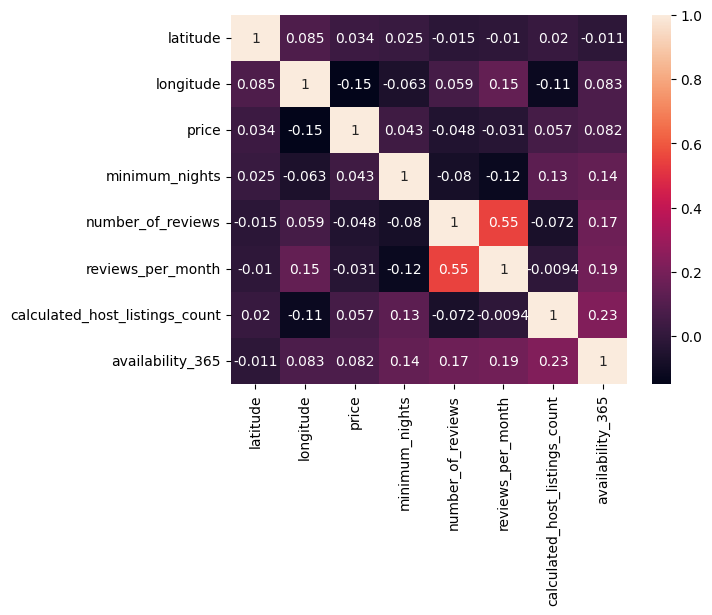

In [3]:
sns.heatmap(df_num.corr(), annot = True)
plt.savefig("Correlation.jpg")

In [4]:
df_cat.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

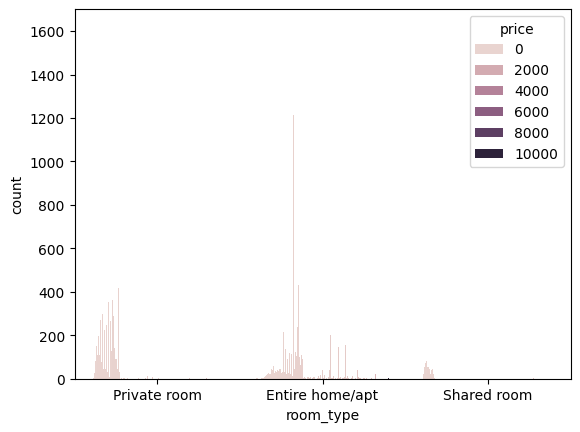

In [5]:

sns.countplot(data = df, x = "room_type", hue = "price")
plt.show()

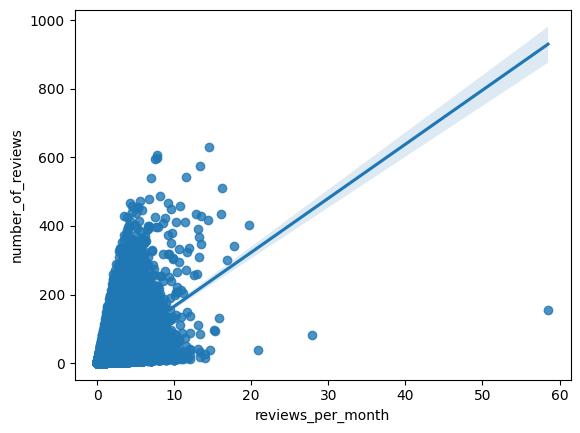

In [6]:
sns.regplot(data = df, x = "reviews_per_month", y = "number_of_reviews")
plt.show()

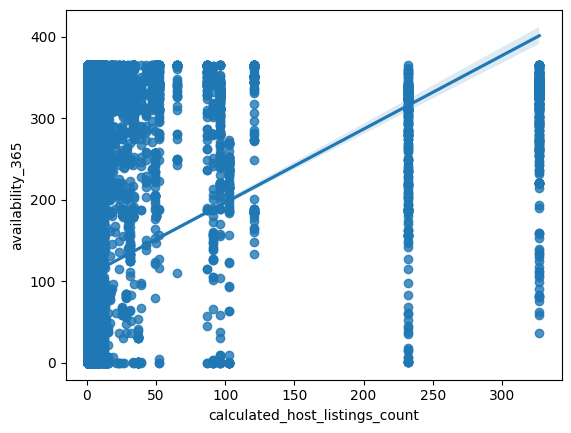

In [6]:
sns.regplot(data = df, x = "calculated_host_listings_count", y = "availability_365")
plt.show()

In [7]:
df_cat.columns


Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

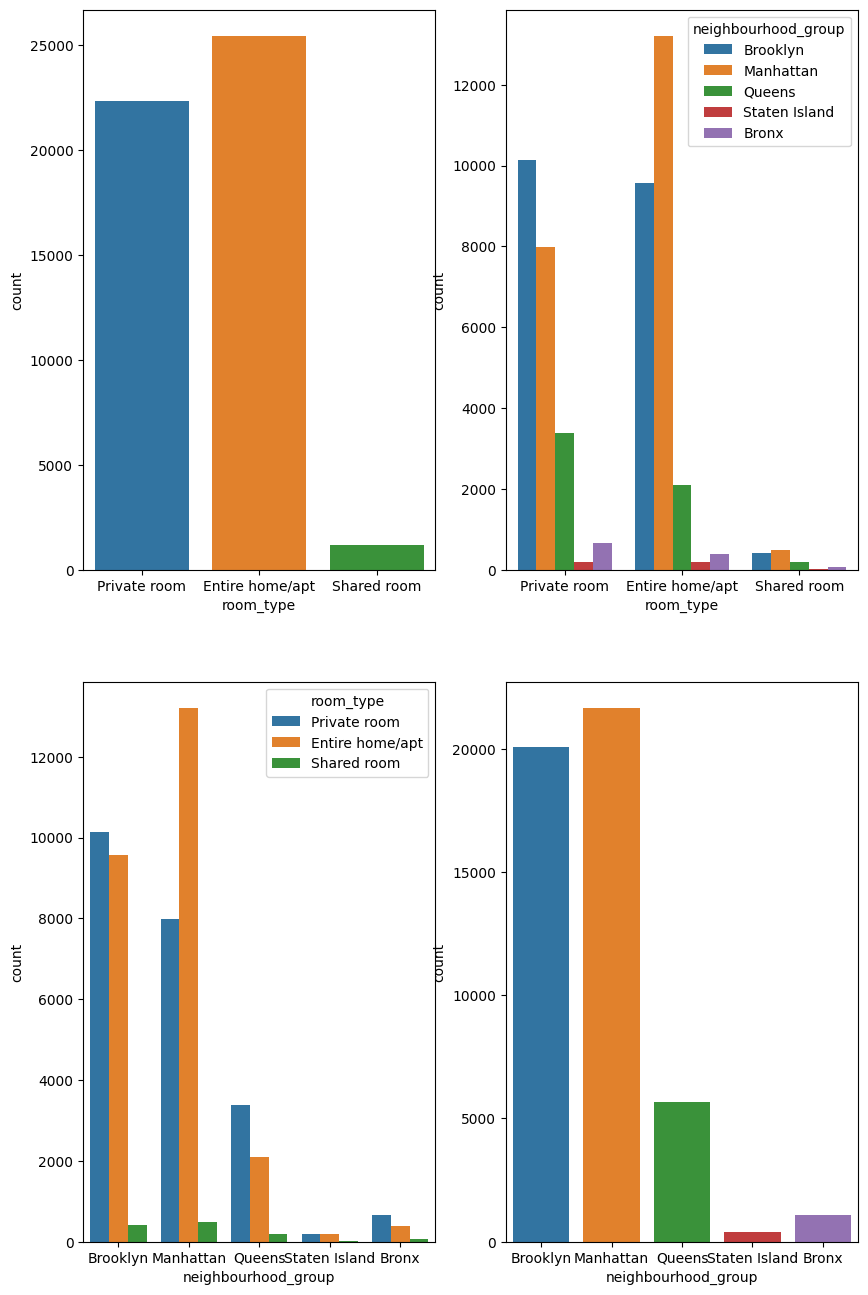

In [8]:
df_cat_columns = ["room_type","neighbourhood_group","neighbourhood","last_review"]
fig,axis = plt.subplots(len(df_cat_columns[0:2]), len(df_cat_columns[0:2]), figsize= (10,16))
i = -1
j = -1

for c in df_cat_columns[0:2]:
    i += 1
    for cc in df_cat_columns[0:2]:
        j += 1
        sns.countplot(ax = axis[i, j],data= df_cat, x = c , hue = cc)
        #print(f"processing cell [{i},{j}]")

    j = -1

plt.show()      

                                  count                           mean  \
latitude                        48895.0                      40.728949   
longitude                       48895.0                      -73.95217   
price                           48895.0                     152.720687   
minimum_nights                  48895.0                       7.029962   
number_of_reviews               48895.0                      23.274466   
last_review                       48895  2018-10-14 06:10:06.540546304   
reviews_per_month               48895.0                       1.373221   
calculated_host_listings_count  48895.0                       7.143982   
availability_365                48895.0                     112.781327   

                                                min                  25%  \
latitude                                   40.49979              40.6901   
longitude                                 -74.24442            -73.98307   
price                          

<Figure size 640x480 with 0 Axes>

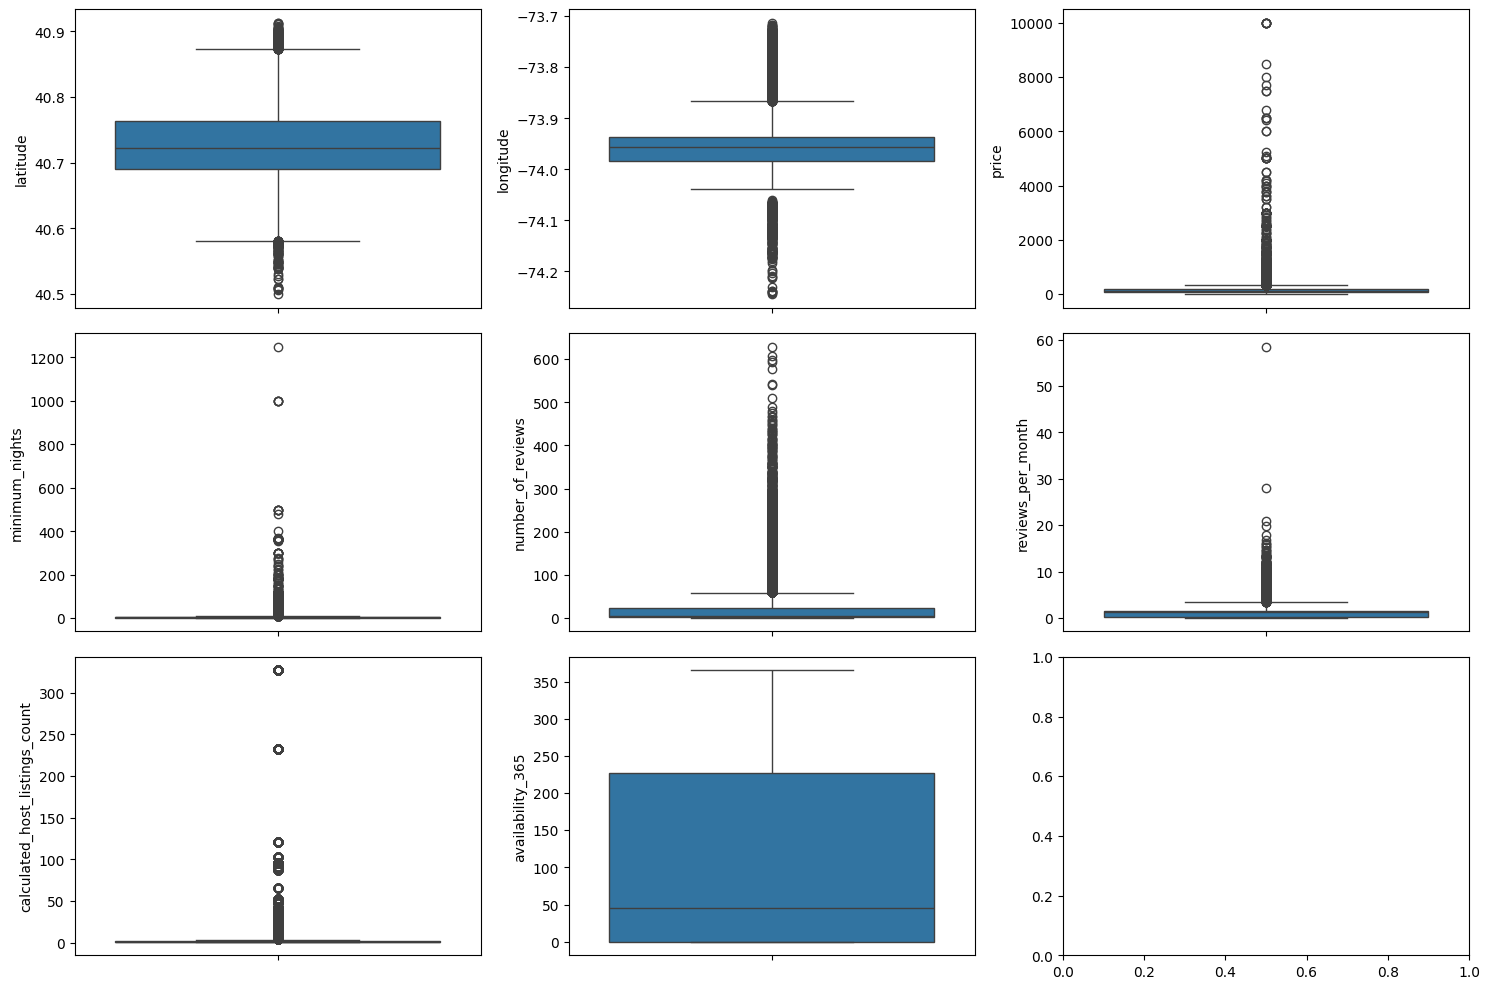

In [13]:
#DAY 2 
from sklearn.model_selection import train_test_split


# Summarize the data and create boxplots
summary  = df.describe().T
print(summary)
plt.clf()

fig, axis = plt.subplots(3, 3, figsize=(15, 10))
sns.boxplot(ax=axis[0, 0], data=df, y="latitude")
sns.boxplot(ax=axis[0, 1], data=df, y="longitude")
sns.boxplot(ax=axis[0, 2], data=df, y="price")
sns.boxplot(ax=axis[1, 0], data=df, y="minimum_nights")
sns.boxplot(ax=axis[1, 1], data=df, y="number_of_reviews")
sns.boxplot(ax=axis[1, 2], data=df, y="reviews_per_month")
sns.boxplot(ax=axis[2, 0], data=df, y="calculated_host_listings_count")
sns.boxplot(ax=axis[2, 1], data=df, y="availability_365")

plt.tight_layout()
plt.savefig("boxplots.jpg")

# Calculate price statistics and identify outliers
price_stats = df["price"].describe()
print(price_stats)
price_iqr = price_stats["75%"] - price_stats["25%"]
price_upper_limit = price_stats["75%"] + 1.5 * price_iqr
price_lower_limit = price_stats["25%"] - 1.5 * price_iqr
print(f"The upper and lower limits for finding outliers are {round(price_upper_limit, 2)} and {round(price_lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")
print(df[df["price"] > 5000])
print(df.isnull().sum().sort_values(ascending=False) / len(df))

# Convert last_review column to pandas datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

# Fill missing dates with the previous valid date
df['last_review'] = df['last_review'].ffill()

# Fill missing data with mean number of reviews per month
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())
print(df.isnull().sum().sort_values(ascending=False) / len(df))

# Prepare data for machine learning model
from sklearn.model_selection import train_test_split

# Assuming df_num is a DataFrame with numerical features
df_num = df.select_dtypes(include=['number'])

# Define target variable y and feature variables X
y = df_num["price"]
X = df_num.drop("price", axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())

